# Here it is

Finally the main notebook is created

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
pd.set_option('display.max_columns', None) #show all columns of a df

In [6]:
Passers = pd.read_excel(r"/Programming Stuff/Python/qbs/data/passingstats.xlsx")
Passers.head(5)
#show the first 5 rows of the df

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Succ%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds2,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Tua Tagovailoa,MIA,25,QB,7,7,5-2-0,163,229,71.2,2092,15,6.6,6,2.6,102,55.9,69,9.1,9.3,12.8,298.9,110.4,69.3,9,52,3.8,8.57,8.70,1.0,1.0
1,2,Kirk Cousins,MIN,35,QB,7,7,3-4-0,193,280,68.9,2057,16,5.7,5,1.8,99,45.8,62,7.3,7.7,10.7,293.9,101.7,60.5,15,97,5.1,6.64,6.97,NaN,NaN
2,3,Patrick Mahomes,KAN,28,QB,7,7,6-1-0,185,266,69.5,2017,15,5.6,6,2.3,95,51.6,54,7.6,7.7,10.9,288.1,101.0,76.9,7,50,2.6,7.21,7.32,0.0,1.0
3,4,Matthew Stafford,LAR,35,QB,7,7,3-4-0,153,256,59.8,1908,7,2.7,6,2.3,90,45.3,49,7.5,6.9,12.5,272.6,82.3,60.3,18,136,6.6,6.47,5.99,0.0,1.0
4,5,Jared Goff,DET,29,QB,7,7,5-2-0,174,256,68.0,1902,11,4.3,4,1.6,90,50.2,45,7.4,7.6,10.9,271.7,97.5,67.7,15,92,5.5,6.68,6.83,1.0,1.0


In [7]:
#Get only QBs
QB = Passers[Passers.Pos == "QB"]
QB.tail(5)

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Succ%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds2,Sk%,NY/A,ANY/A,4QC,GWD
56,57,Clayton Tune,ARI,24,QB,1,0,NaN,1,1,100.0,4,0,0.0,0,0.0,0,0.0,4,4.0,4.0,4.0,4.0,83.3,0.0,0,0,0.0,4.0,4.0,NaN,NaN
58,59,Sam Darnold,SFO,26,QB,4,0,NaN,1,1,100.0,1,0,0.0,0,0.0,0,0.0,1,1.0,1.0,1.0,0.3,79.2,0.4,0,0,0.0,1.0,1.0,NaN,NaN
59,60,Jake Browning,CIN,27,QB,1,0,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,NaN,0.0,39.6,3.1,0,0,0.0,0.0,0.0,NaN,NaN
61,62,Tyler Huntley,BAL,25,QB,2,0,NaN,0,1,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,NaN,0.0,39.6,1.3,0,0,0.0,0.0,0.0,NaN,NaN
62,63,Aaron Rodgers,NYJ,40,QB,1,1,1-0-0,0,1,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,NaN,0.0,39.6,2.7,1,10,50.0,-5.0,-5.0,NaN,NaN


In [8]:
#Set an attempt minimum
QB_eligible = QB[QB.Att >=100]
QB_eligible.sort_values("Att", ascending = False).head(5) #sort elements from highest # of attempts to lowest

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Succ%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds2,Sk%,NY/A,ANY/A,4QC,GWD
1,2,Kirk Cousins,MIN,35,QB,7,7,3-4-0,193,280,68.9,2057,16,5.7,5,1.8,99,45.8,62,7.3,7.7,10.7,293.9,101.7,60.5,15,97,5.1,6.64,6.97,NaN,NaN
2,3,Patrick Mahomes,KAN,28,QB,7,7,6-1-0,185,266,69.5,2017,15,5.6,6,2.3,95,51.6,54,7.6,7.7,10.9,288.1,101.0,76.9,7,50,2.6,7.21,7.32,0.0,1.0
3,4,Matthew Stafford,LAR,35,QB,7,7,3-4-0,153,256,59.8,1908,7,2.7,6,2.3,90,45.3,49,7.5,6.9,12.5,272.6,82.3,60.3,18,136,6.6,6.47,5.99,0.0,1.0
4,5,Jared Goff,DET,29,QB,7,7,5-2-0,174,256,68.0,1902,11,4.3,4,1.6,90,50.2,45,7.4,7.6,10.9,271.7,97.5,67.7,15,92,5.5,6.68,6.83,1.0,1.0
7,8,Sam Howell,WAS,23,QB,7,7,3-4-0,167,256,65.2,1749,9,3.5,7,2.7,80,42.6,41,6.8,6.3,10.5,249.9,85.2,41.4,40,267,13.5,5.01,4.55,2.0,2.0


In [9]:
#Remove PB and AP symbols by QB's name
QB_eligible['Player'] = QB_eligible['Player'].str.replace('*', '')
QB_eligible['Player'] = QB_eligible['Player'].str.replace('+', '')
QB_eligible.head(10)

C:\Users\rudra_6s5ixou\AppData\Local\Temp\ipykernel_35664\1763104107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QB_eligible['Player'] = QB_eligible['Player'].str.replace('*', '')
C:\Users\rudra_6s5ixou\AppData\Local\Temp\ipykernel_35664\1763104107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QB_eligible['Player'] = QB_eligible['Player'].str.replace('+', '')


,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Succ%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds2,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Tua Tagovailoa,MIA,25,QB,7,7,5-2-0,163,229,71.2,2092,15,6.6,6,2.6,102,55.9,69,9.1,9.3,12.8,298.9,110.4,69.3,9,52,3.8,8.57,8.70,1.0,1.0
1,2,Kirk Cousins,MIN,35,QB,7,7,3-4-0,193,280,68.9,2057,16,5.7,5,1.8,99,45.8,62,7.3,7.7,10.7,293.9,101.7,60.5,15,97,5.1,6.64,6.97,NaN,NaN
2,3,Patrick Mahomes,KAN,28,QB,7,7,6-1-0,185,266,69.5,2017,15,5.6,6,2.3,95,51.6,54,7.6,7.7,10.9,288.1,101.0,76.9,7,50,2.6,7.21,7.32,0.0,1.0
3,4,Matthew Stafford,LAR,35,QB,7,7,3-4-0,153,256,59.8,1908,7,2.7,6,2.3,90,45.3,49,7.5,6.9,12.5,272.6,82.3,60.3,18,136,6.6,6.47,5.99,0.0,1.0
4,5,Jared Goff,DET,29,QB,7,7,5-2-0,174,256,68.0,1902,11,4.3,4,1.6,90,50.2,45,7.4,7.6,10.9,271.7,97.5,67.7,15,92,5.5,6.68,6.83,1.0,1.0
5,6,Josh Allen,BUF,27,QB,7,7,4-3-0,174,246,70.7,1841,15,6.1,7,2.8,91,53.5,55,7.5,7.4,10.6,263.0,100.7,74.8,10,43,3.9,7.02,6.96,1.0,1.0
6,7,Jalen Hurts,PHI,25,QB,7,7,6-1-0,164,244,67.2,1821,9,3.7,8,3.3,79,44.8,63,7.5,6.7,11.1,260.1,87.8,61.9,17,95,6.5,6.61,5.92,0.0,1.0
7,8,Sam Howell,WAS,23,QB,7,7,3-4-0,167,256,65.2,1749,9,3.5,7,2.7,80,42.6,41,6.8,6.3,10.5,249.9,85.2,41.4,40,267,13.5,5.01,4.55,2.0,2.0
8,9,Brock Purdy,SFO,24,QB,7,7,5-2-0,131,193,67.9,1668,11,5.7,3,1.6,83,55.6,42,8.6,9.1,12.7,238.3,107.2,75.6,12,71,5.9,7.79,8.20,NaN,NaN
9,10,C.J. Stroud,HOU,22,QB,6,6,3-3-0,127,213,59.6,1660,9,4.2,1,0.5,77,44.7,68,7.8,8.4,13.1,276.7,96.4,57.0,13,115,5.8,6.84,7.43,NaN,NaN


In [10]:
#EDA
QB_eligible.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      32 non-null     int64  
 1   Player  32 non-null     object 
 2   Tm      32 non-null     object 
 3   Age     32 non-null     int64  
 4   Pos     32 non-null     object 
 5   G       32 non-null     int64  
 6   GS      32 non-null     int64  
 7   QBrec   32 non-null     object 
 8   Cmp     32 non-null     int64  
 9   Att     32 non-null     int64  
 10  Cmp%    32 non-null     float64
 11  Yds     32 non-null     int64  
 12  TD      32 non-null     int64  
 13  TD%     32 non-null     float64
 14  Int     32 non-null     int64  
 15  Int%    32 non-null     float64
 16  1D      32 non-null     int64  
 17  Succ%   32 non-null     float64
 18  Lng     32 non-null     int64  
 19  Y/A     32 non-null     float64
 20  AY/A    32 non-null     float64
 21  Y/C     32 non-null     float64
 22  Y/G     3

In [11]:
#EDA
QB_eligible.describe()

,Rk,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Succ%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds2,Sk%,NY/A,ANY/A,4QC,GWD
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,22.000000,22.000000
mean,16.500000,27.437500,6.375000,6.218750,137.125000,209.000000,65.437500,1474.781250,8.281250,3.906250,4.875000,2.418750,69.562500,45.300000,57.156250,7.025000,6.721875,10.746875,229.006250,88.868750,53.125000,15.656250,103.531250,7.13125,6.068438,5.790938,1.045455,1.363636
std,9.380832,3.975226,0.793116,1.007532,29.397992,40.552634,3.715855,354.764596,3.674097,1.468143,1.680054,0.966349,17.153834,5.321533,13.278917,0.839355,1.164179,1.162585,36.550936,10.239406,13.131739,6.408711,42.752087,2.90355,0.979882,1.280643,0.722250,0.726731
min,1.000000,22.000000,4.000000,3.000000,66.000000,107.000000,57.500000,683.000000,2.000000,1.300000,1.000000,0.500000,33.000000,35.800000,30.000000,5.300000,4.300000,8.400000,169.600000,71.700000,32.100000,7.000000,43.000000,2.60000,4.100000,2.820000,0.000000,1.000000
25%,8.750000,24.750000,6.000000,6.000000,111.750000,183.500000,62.000000,1222.750000,6.000000,2.925000,4.000000,1.775000,55.750000,40.775000,45.750000,6.475000,5.900000,10.175000,203.800000,81.675000,41.700000,12.000000,81.000000,5.45000,5.562500,5.082500,1.000000,1.000000
50%,16.500000,26.500000,7.000000,6.500000,142.000000,212.500000,65.900000,1489.500000,7.500000,3.700000,4.000000,2.250000,68.500000,44.750000,59.000000,7.100000,6.700000,10.800000,227.900000,87.500000,53.400000,15.000000,101.000000,6.55000,6.060000,5.855000,1.000000,1.000000
75%,24.250000,29.250000,7.000000,7.000000,161.500000,240.250000,68.150000,1688.250000,10.250000,4.900000,6.000000,2.800000,80.000000,49.600000,68.250000,7.500000,7.450000,11.300000,260.825000,97.200000,61.750000,18.000000,127.250000,8.10000,6.647500,6.612500,1.750000,1.750000
max,32.000000,35.000000,7.000000,7.000000,193.000000,280.000000,71.200000,2092.000000,16.000000,6.800000,8.000000,5.400000,102.000000,55.900000,80.000000,9.100000,9.300000,13.100000,298.900000,110.400000,76.900000,40.000000,267.000000,15.60000,8.570000,8.700000,2.000000,4.000000


c:\Users\rudra_6s5ixou\Anaconda3\envs\data-science-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rudra_6s5ixou\Anaconda3\envs\data-science-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Yds', ylabel='TD'>

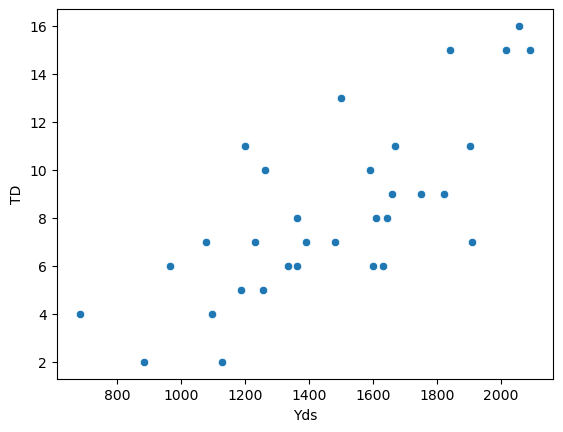

In [17]:
sns.scatterplot(x="Yds", y="TD", data = QB_eligible)

c:\Users\rudra_6s5ixou\Anaconda3\envs\data-science-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rudra_6s5ixou\Anaconda3\envs\data-science-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TD', ylabel='Count'>

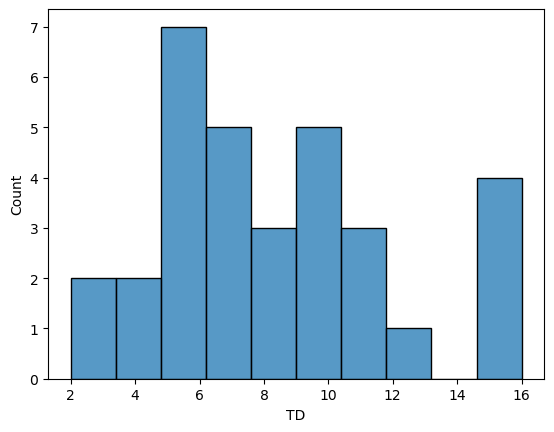

In [18]:
sns.histplot(QB_eligible['TD'], bins = 10)

c:\Users\rudra_6s5ixou\Anaconda3\envs\data-science-env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


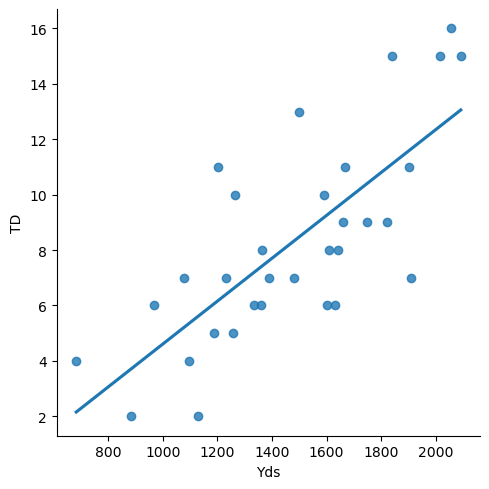

In [19]:
#Add regression model fit line with 95% CI
sns.lmplot(x="Yds", y="TD", data = QB_eligible, lowess = False, ci = True)

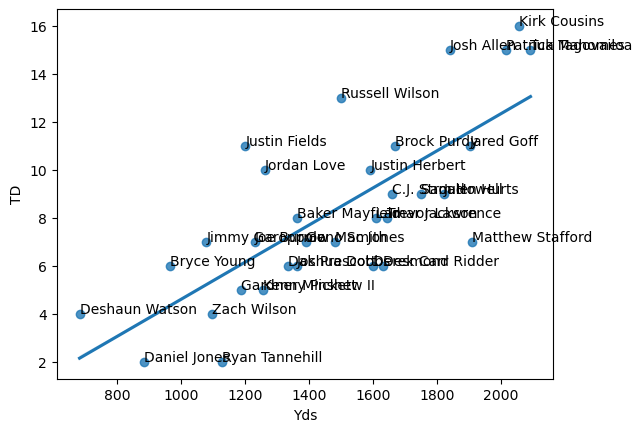

In [20]:
#Add QB Name
plt = sns.regplot(x="Yds", y="TD", data = QB_eligible, lowess = False, ci = True)

for x, y, z in zip(QB_eligible['Yds'], QB_eligible['TD'], QB_eligible['Player']):
  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from
  plt.text(x = x, #x coordinate position of data label
           y = y+0.02,
           s = z.format(y)
           )

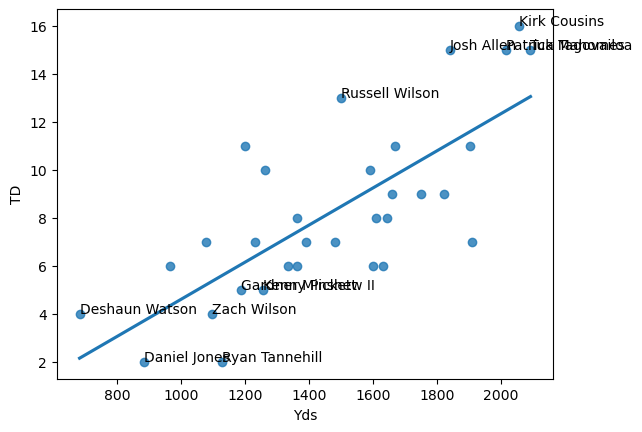

In [21]:
#Clean visualization up
plt = sns.regplot(x="Yds", y="TD", data = QB_eligible, lowess = False, ci = True)

for x, y, z in zip(QB_eligible['Yds'], QB_eligible['TD'], QB_eligible['Player']):
  if(y > 12 or y < 6):
  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from
    plt.text(x = x, #x coordinate position of data label
           y = y+0.02,
           s = z.format(y)
           )